### Importing all the required libraries

In [1]:

import imdlib as imd

import matplotlib.pyplot as plt

import numpy as np

import cartopy.feature as cfeature

import cartopy.crs as ccrs

import xarray as xr

import pandas as pd


### Reading IMD Datasets

In [2]:

# start_yr = 1980
# end_yr = 2022
# variable = 'rain'

# file_dir = r'C:\Users\RINURAGAVI\Desktop\SUMMER\Rain data'

# data = imd.open_data(variable, start_yr, end_yr, fn_format = 'yearwise', file_dir = file_dir)

# data


In [3]:
#pwd

### Getting the xarray object for further processing

In [4]:

# ds = data.get_xarray()

# print(ds)


### Saving it as .nc file

In [5]:

# # Converting to netcdf file

# ds.to_netcdf('rainfall_imd_data_1980_2022.nc')


In [6]:

ds = xr.open_dataset('rainfall_imd_data_1980_2022.nc')

ds


<xarray.Dataset>
Dimensions:  (time: 15706, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
Data variables:
    rain     (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2023-06-17 15:07:51.727411 Python
    references:   
    comment:      
    crs:          epsg:4326

### Removing NaN values

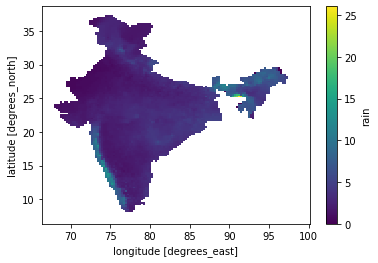

In [7]:

#### In IMD binary files, nan values are given by -999 value 

ds = ds.where(ds['rain'] != -999.)                                        # Remove NaN values

ds['rain'].mean('time').plot()


### JJAS Plot for Mean Rainfall in India (from 1980 - 2022)

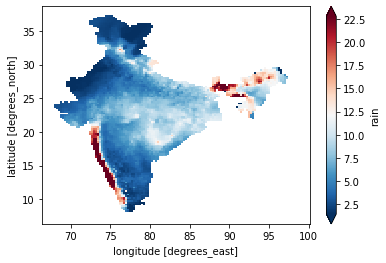

In [8]:

ds_JJAS_mean = ds['rain'].where((ds['time.month'] > 5) & (ds['time.month'] < 10)).mean('time')

ds_JJAS_mean.plot(x = 'lon', y = 'lat', robust = True, cmap = plt.cm.RdBu_r)


### JJAS Plot : Standard deviation 

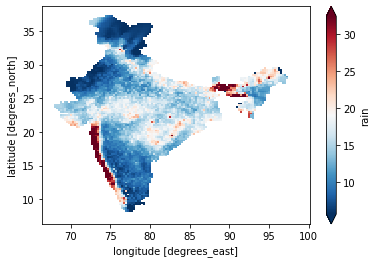

In [9]:

ds_JJAS_stdev = ds['rain'].where((ds['time.month'] > 5) & (ds['time.month'] < 10)).std('time')

ds_JJAS_stdev.plot(x = 'lon', y = 'lat', robust = True, cmap = plt.cm.RdBu_r)


### JJAS Plot : 95th Percentile 

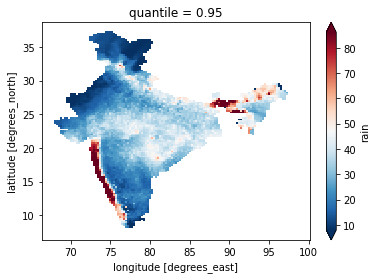

In [10]:
#import numpy as np

ds_JJAS_95th_perc = ds['rain'].where((ds['time.month'] > 5) & (ds['time.month'] < 10)).quantile(0.95, dim='time')

ds_JJAS_95th_perc.plot(x = 'lon', y = 'lat', robust = True, cmap = plt.cm.RdBu_r)


### JJAS Plot : 90th Percentile 

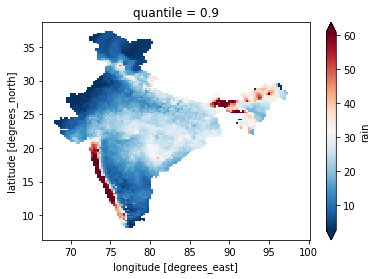

In [11]:
#import numpy as np

ds_JJAS_90th_perc = ds['rain'].where((ds['time.month'] > 5) & (ds['time.month'] < 10)).quantile(0.90, dim = 'time')

ds_JJAS_90th_perc.plot(x = 'lon', y = 'lat', robust = True, cmap = plt.cm.RdBu_r)


### JJAS Plot : Difference between 95th Percentile and mean

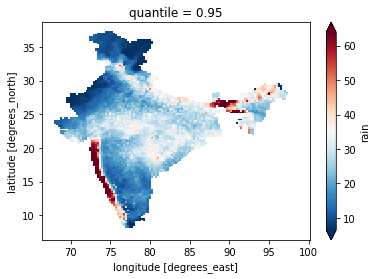

In [12]:

diff_95th_perc_and_mean = ds_JJAS_95th_perc - ds_JJAS_mean

diff_95th_perc_and_mean.plot(x = 'lon', y = 'lat', robust = True, cmap = plt.cm.RdBu_r)


### JJAS Plot : Difference between 90th Percentile and mean

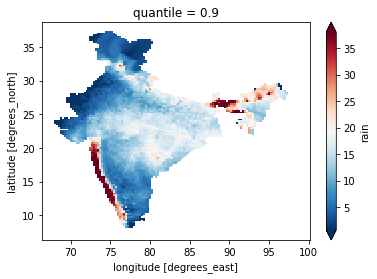

In [13]:

diff_90th_perc_and_mean = ds_JJAS_90th_perc - ds_JJAS_mean

diff_90th_perc_and_mean.plot(x = 'lon', y = 'lat', robust = True, cmap = plt.cm.RdBu_r)


### Trying to Add Boundaries

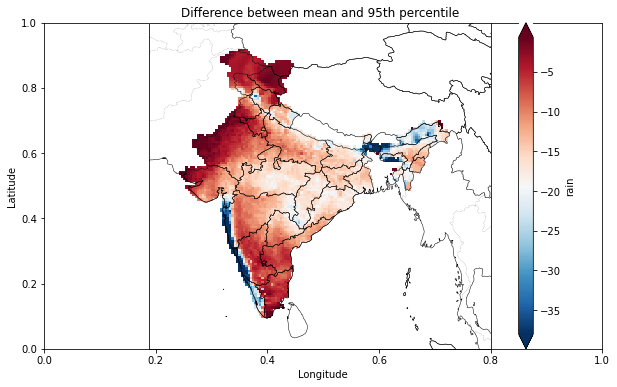

In [14]:
#import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

diff_mean_and_90th_perc = ds_JJAS_mean - ds_JJAS_90th_perc

fig = plt.figure(figsize = (10, 6))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = plt.axes(projection= ccrs.PlateCarree())

diff_mean_and_90th_perc.plot(x = 'lon', y = 'lat', robust = True, ax = ax, cmap = plt.cm.RdBu_r)

ax.add_feature(cfeature.BORDERS, linestyle = ':', linewidth = 0.5, edgecolor = 'gray')
ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
ax.add_feature(cfeature.STATES, linestyle = '-', linewidth = 0.5, edgecolor = 'black')

plt.title('Difference between mean and 95th percentile')

plt.show()


# YEARWISE JJAS PLOTS

### Slicing only the JJAS months

In [15]:

### Selecting only the JJA months of the years

ds_JJAS = ds.sel(time=((ds.time.dt.month >= 6) & (ds.time.dt.month <= 9)))
ds_JJAS = ds_JJAS.where(ds_JJAS['rain'] != -999)

ds_JJAS



<xarray.Dataset>
Dimensions:  (time: 5246, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1980-06-01 1980-06-02 ... 2022-09-30
Data variables:
    rain     (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2023-06-17 15:07:51.727411 Python
    references:   
    comment:      
    crs:          epsg:4326

In [16]:

pd.unique(ds_JJAS.time.dt.month.values.ravel())


array([6, 7, 8, 9], dtype=int64)

### Yearwise JJAS plots : MEAN

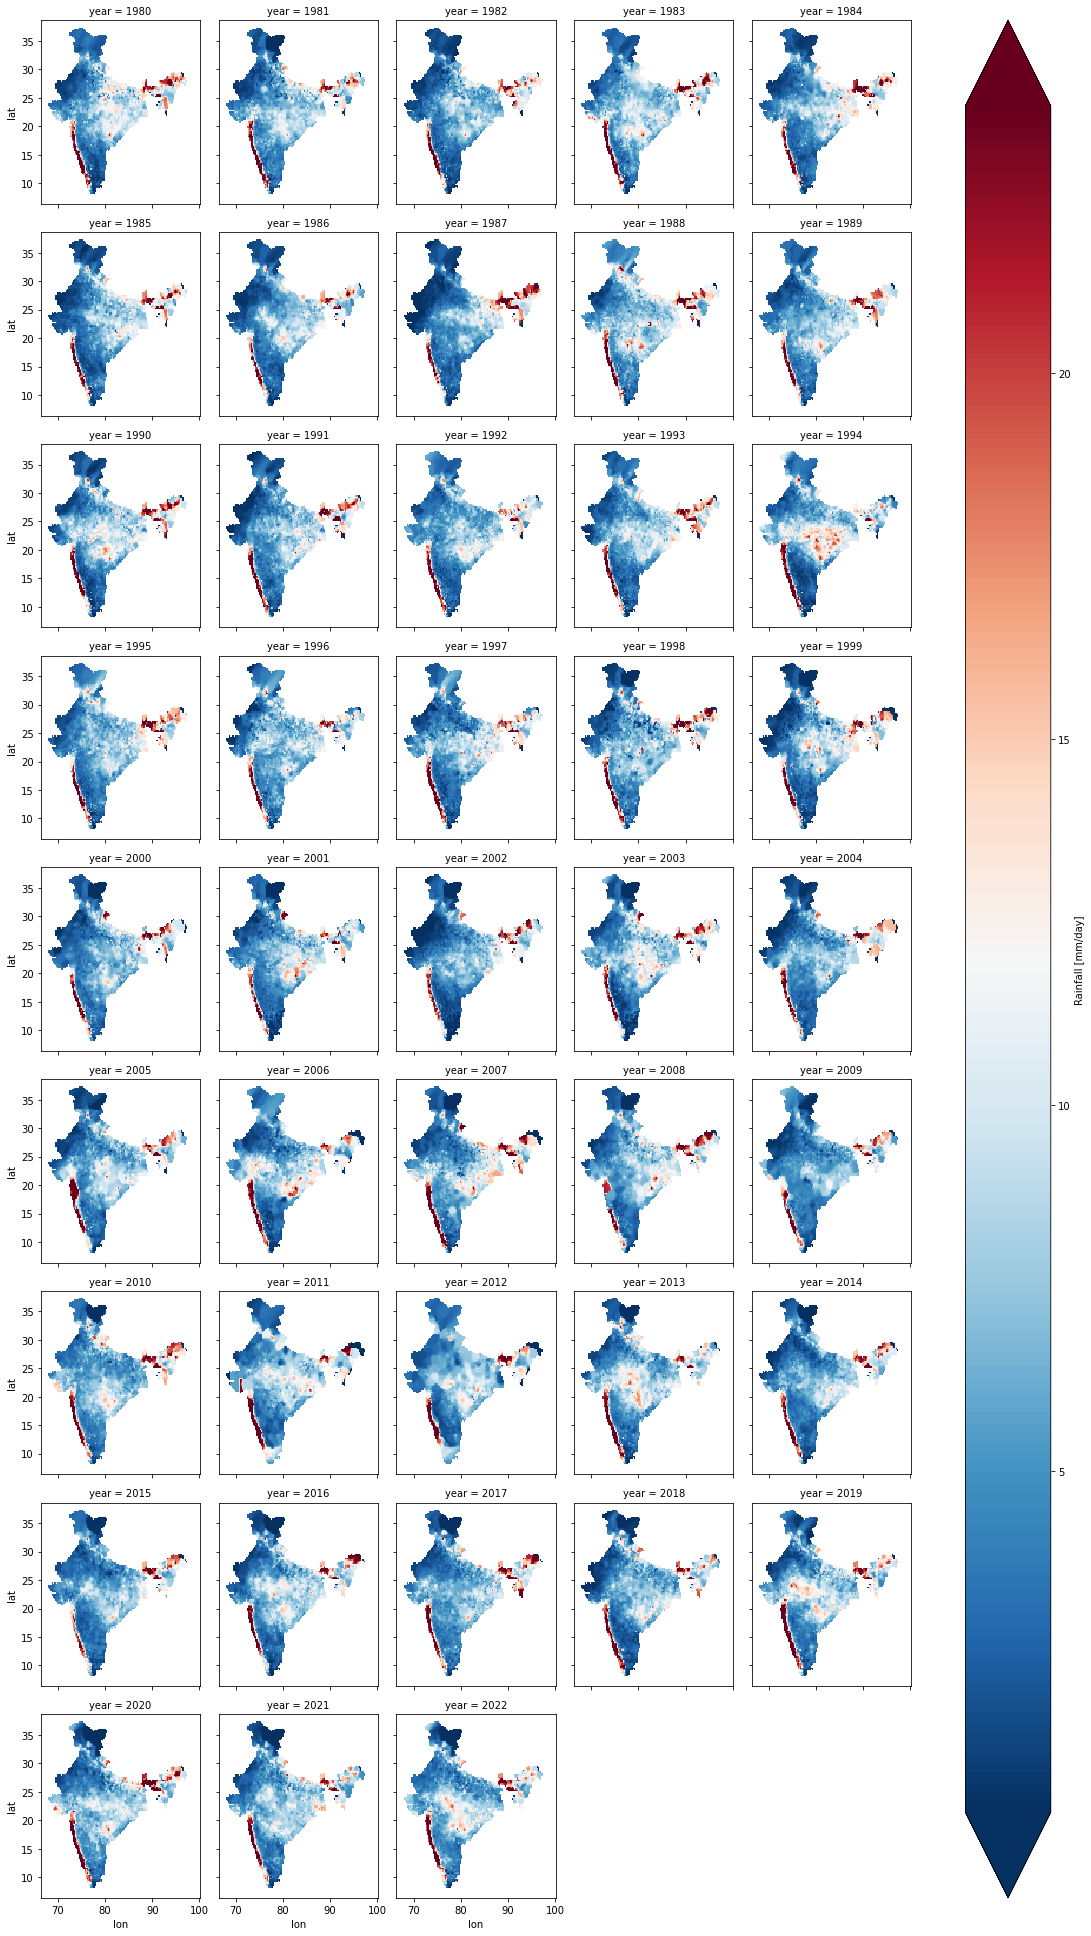

In [17]:
### Grouping yearwise and calculating the mean

ds_JJAS_year_mean = ds_JJAS['rain'].groupby('time.year').mean('time')

ds_JJAS_year_mean.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, robust = True, cmap = plt.cm.RdBu_r)


### Yearwise JJAS plots : STANDARD DEVIATION

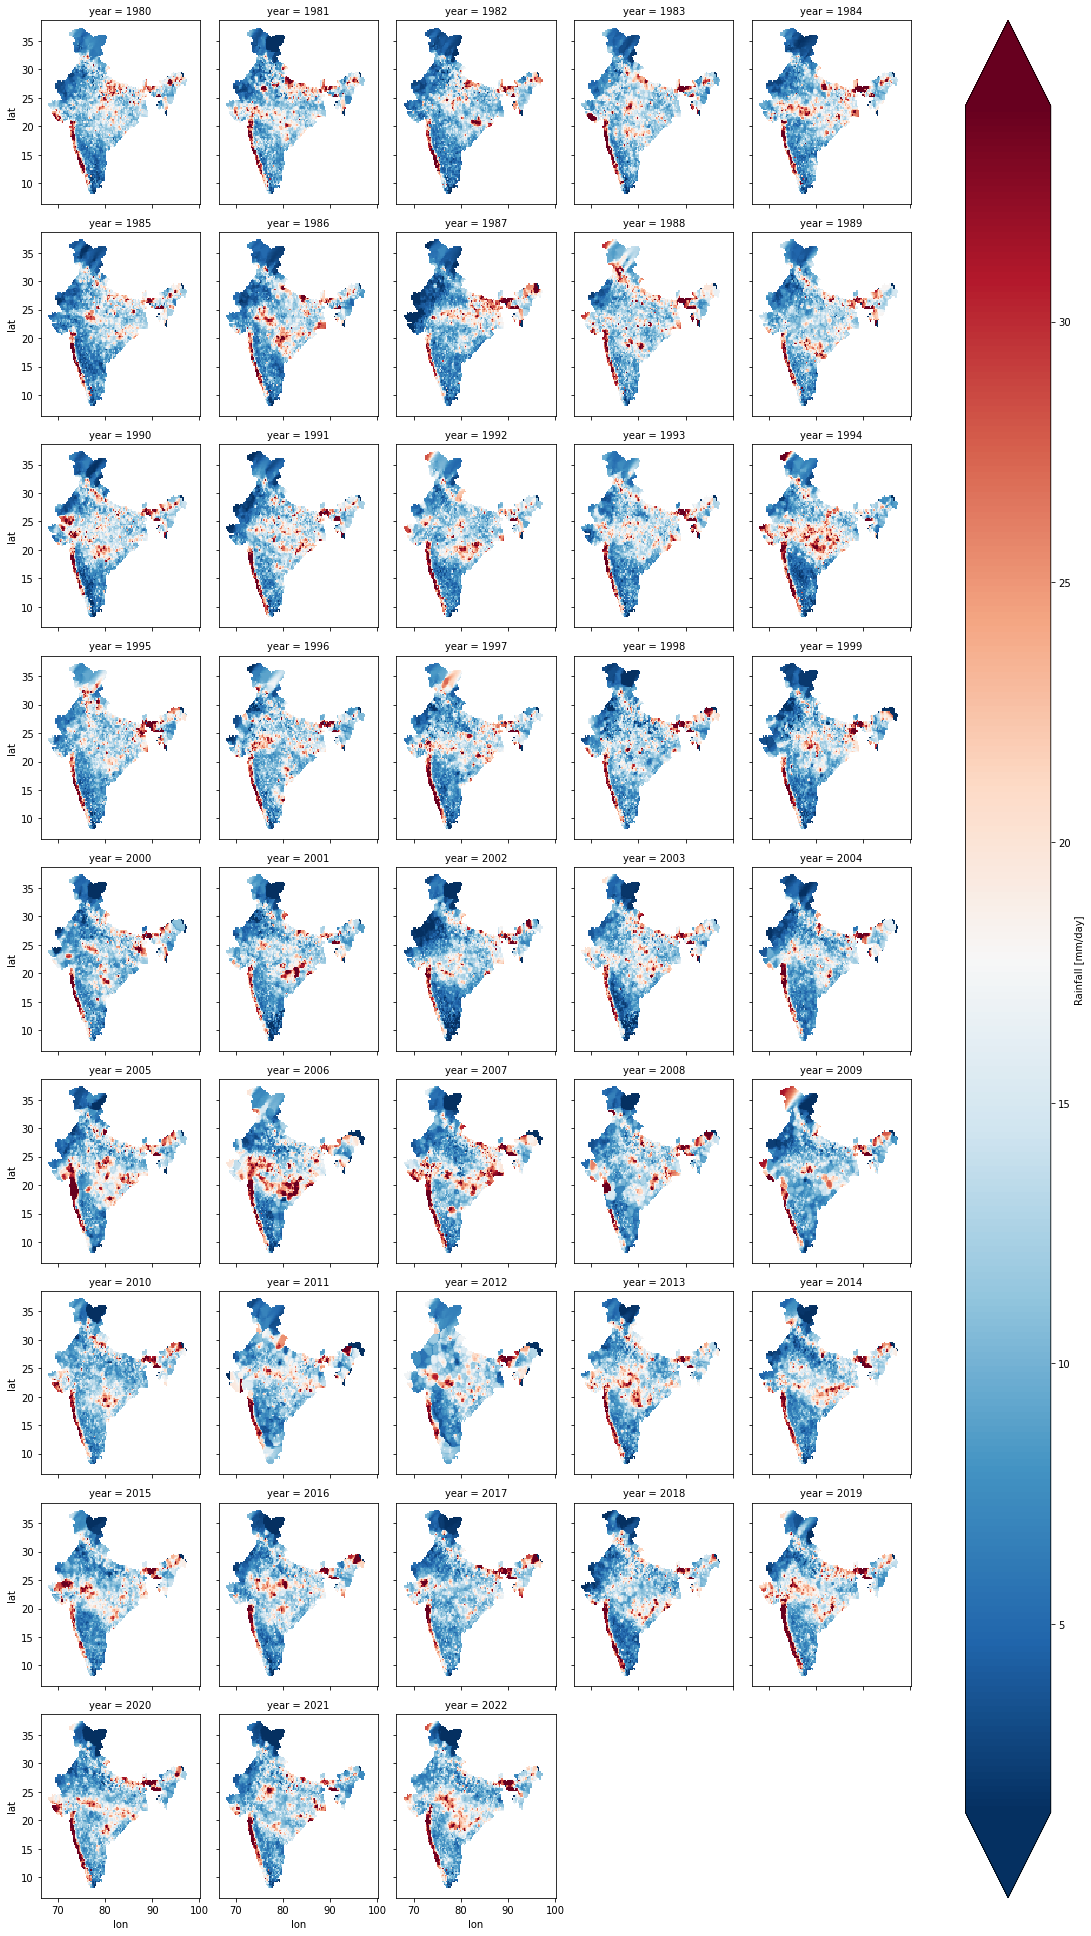

In [18]:
### Grouping yearwise and calculating the Standard deviation

ds_JJAS_year_stdev = ds_JJAS['rain'].groupby('time.year').std('time')

ds_JJAS_year_stdev.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, robust = True, cmap = plt.cm.RdBu_r)


### Yearwise JJAS plots : 95TH PERCENTILE

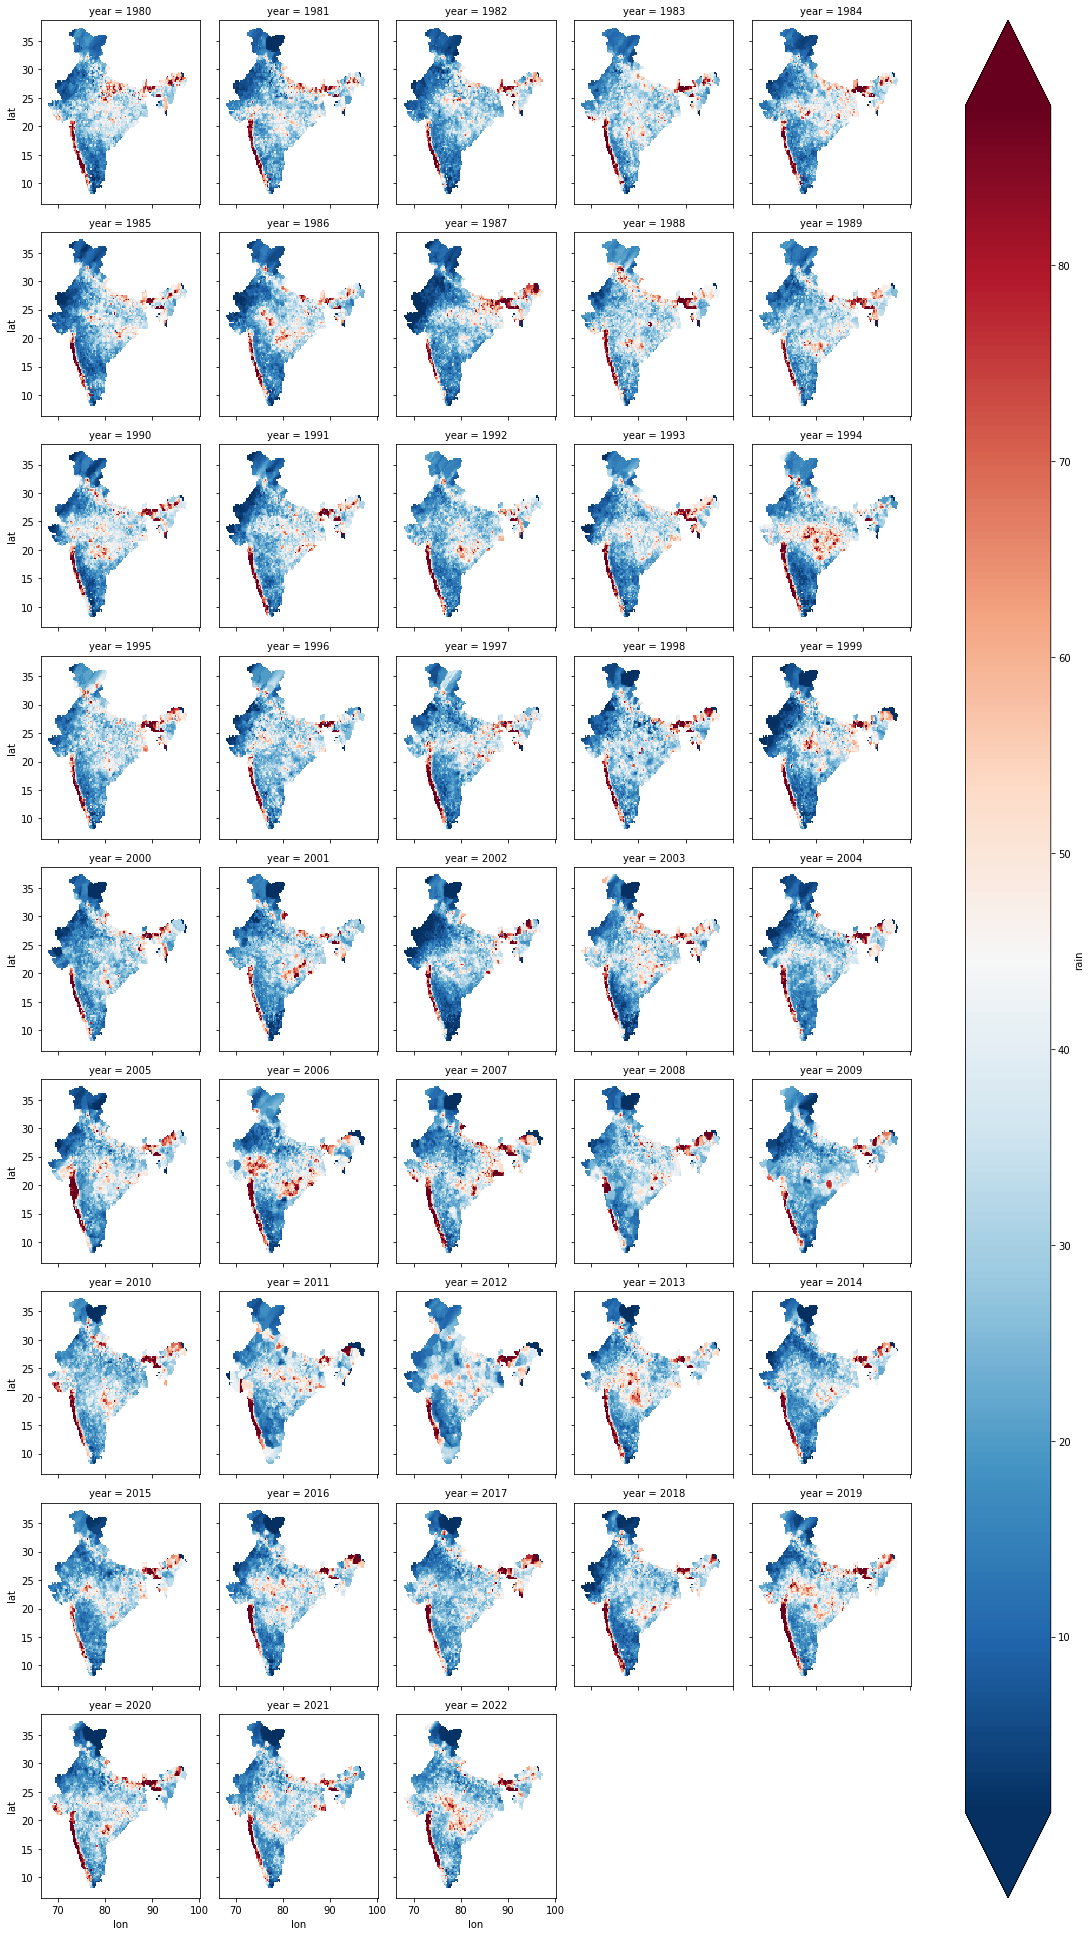

In [19]:
### Grouping yearwise and calculating the 95th percentile

ds_JJAS_year_95th_perc = ds_JJAS['rain'].groupby('time.year').quantile(0.95, dim = 'time')

ds_JJAS_year_95th_perc.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, robust = True, cmap = plt.cm.RdBu_r)


### Yearwise JJAS plots : 90TH PERCENTILE

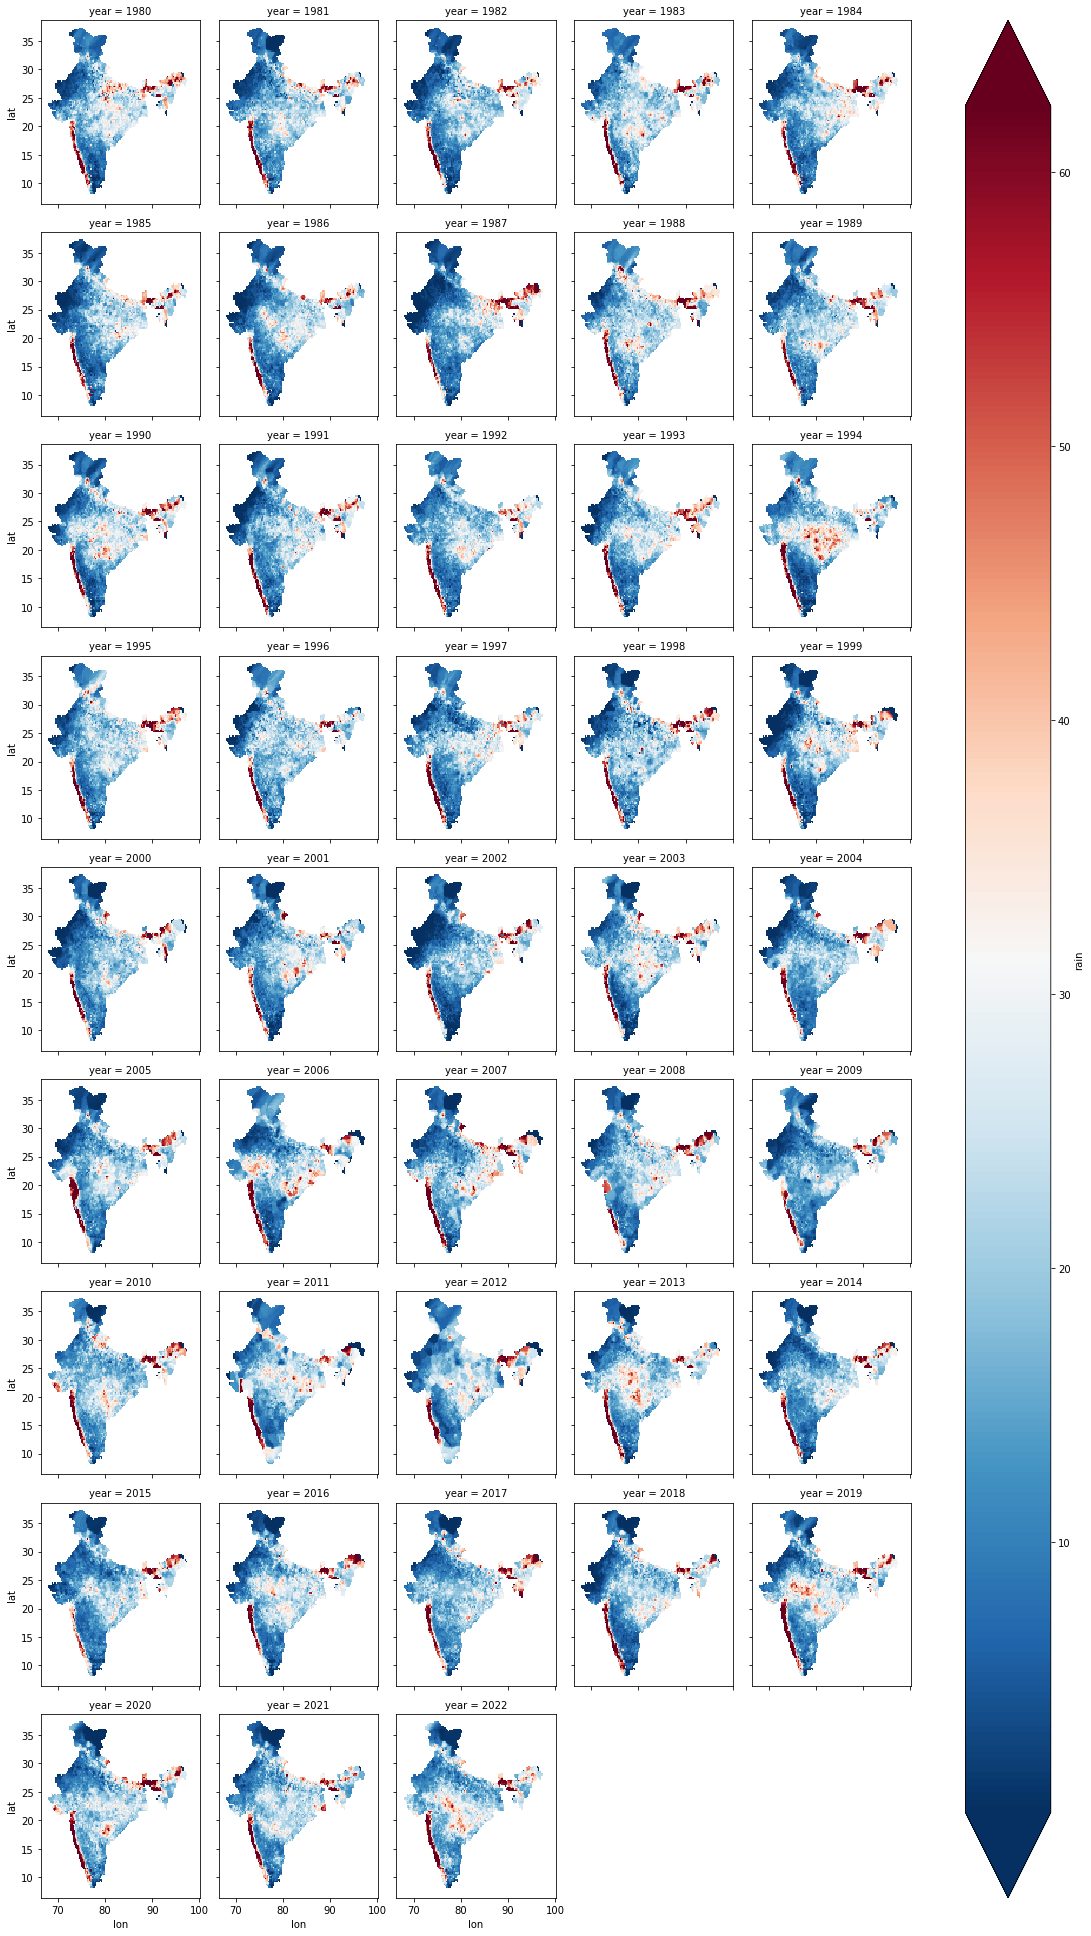

In [20]:
### Grouping yearwise and calculating the 90th percentile

ds_JJAS_year_90th_perc = ds_JJAS['rain'].groupby('time.year').quantile(0.90, dim = 'time')

ds_JJAS_year_90th_perc.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, robust = True, cmap = plt.cm.RdBu_r)


### Yearwise JJAS plots : DIFFERENCE BETWEEN 95TH PERCENTILE AND MEAN

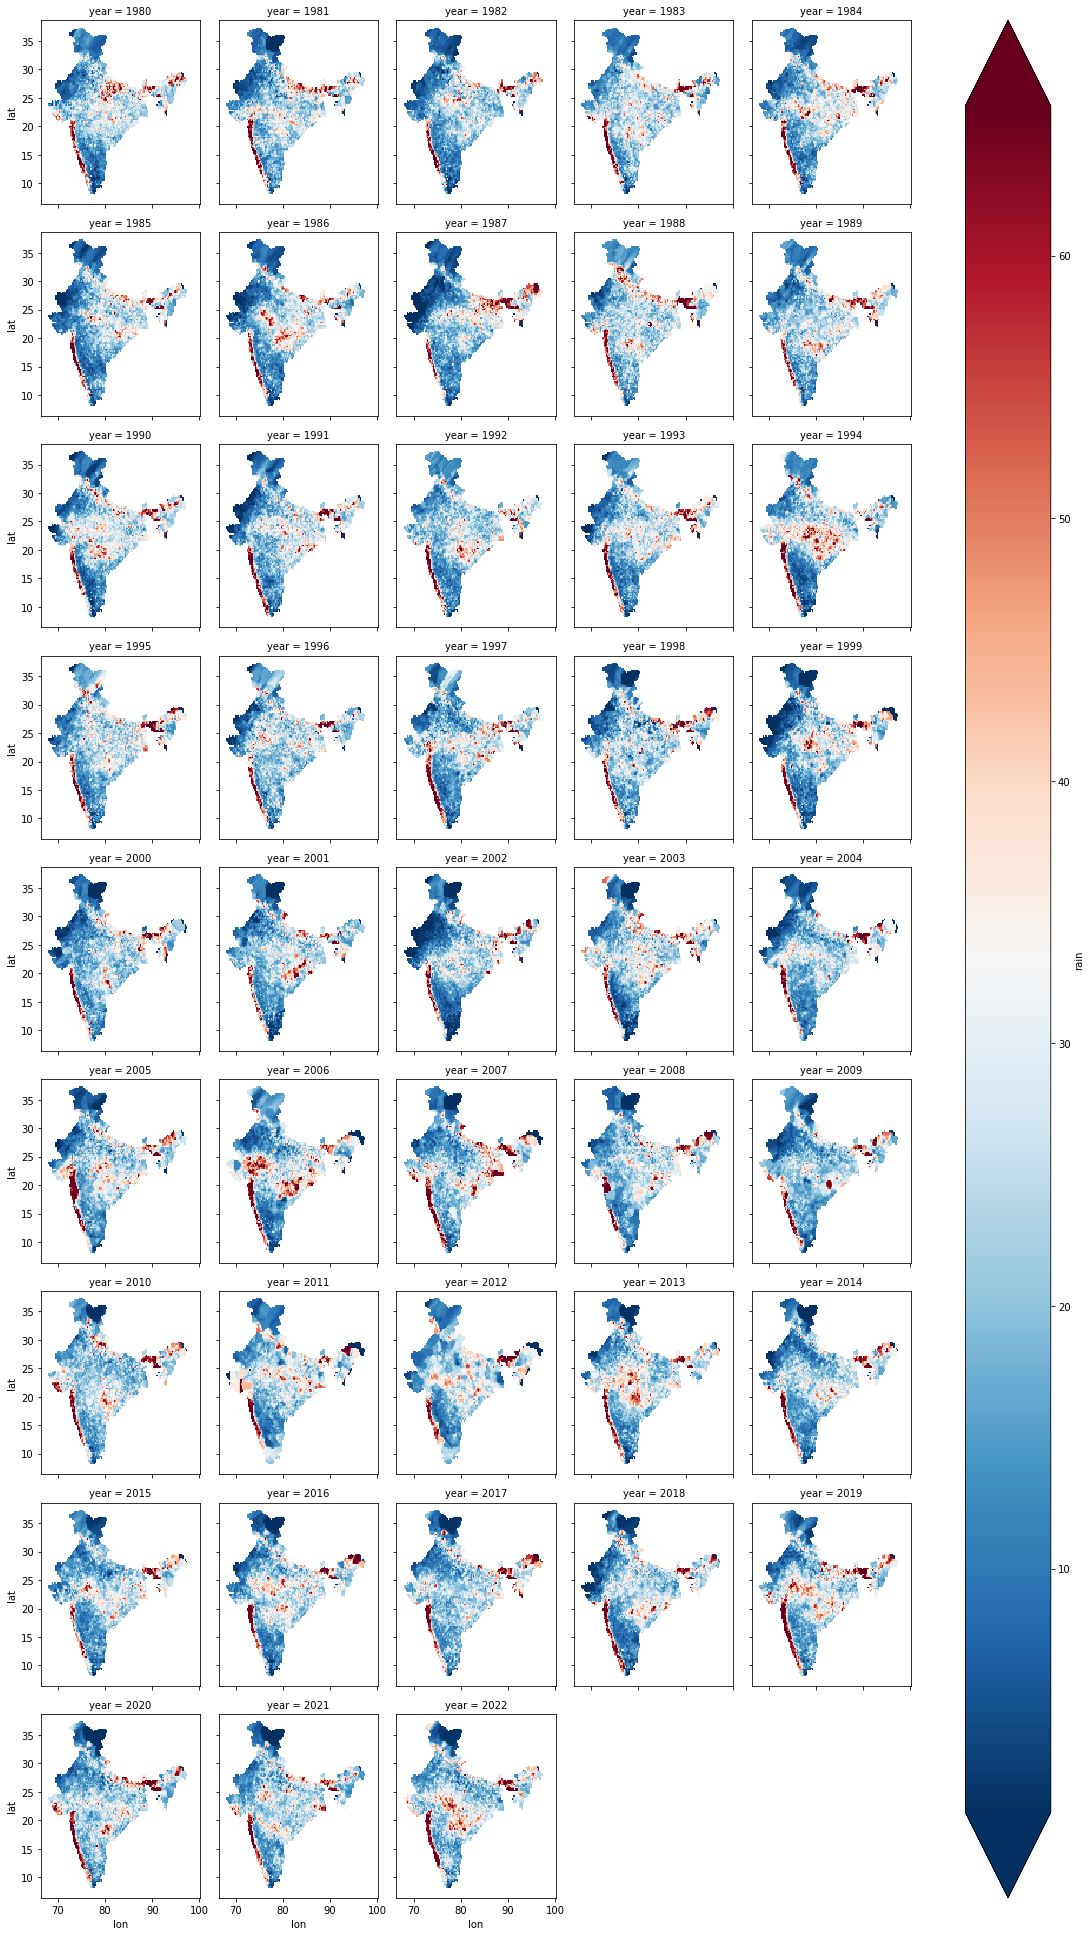

In [21]:

diff_JJAS_year_95th_perc_and_mean = ds_JJAS_year_95th_perc - ds_JJAS_year_mean

diff_JJAS_year_95th_perc_and_mean.plot(x = 'lon', y ='lat', col = 'year', col_wrap = 5, robust = True, cmap = plt.cm.RdBu_r)


### Yearwise JJAS plots : DIFFERENCE BETWEEN 90TH PERCENTILE AND MEAN

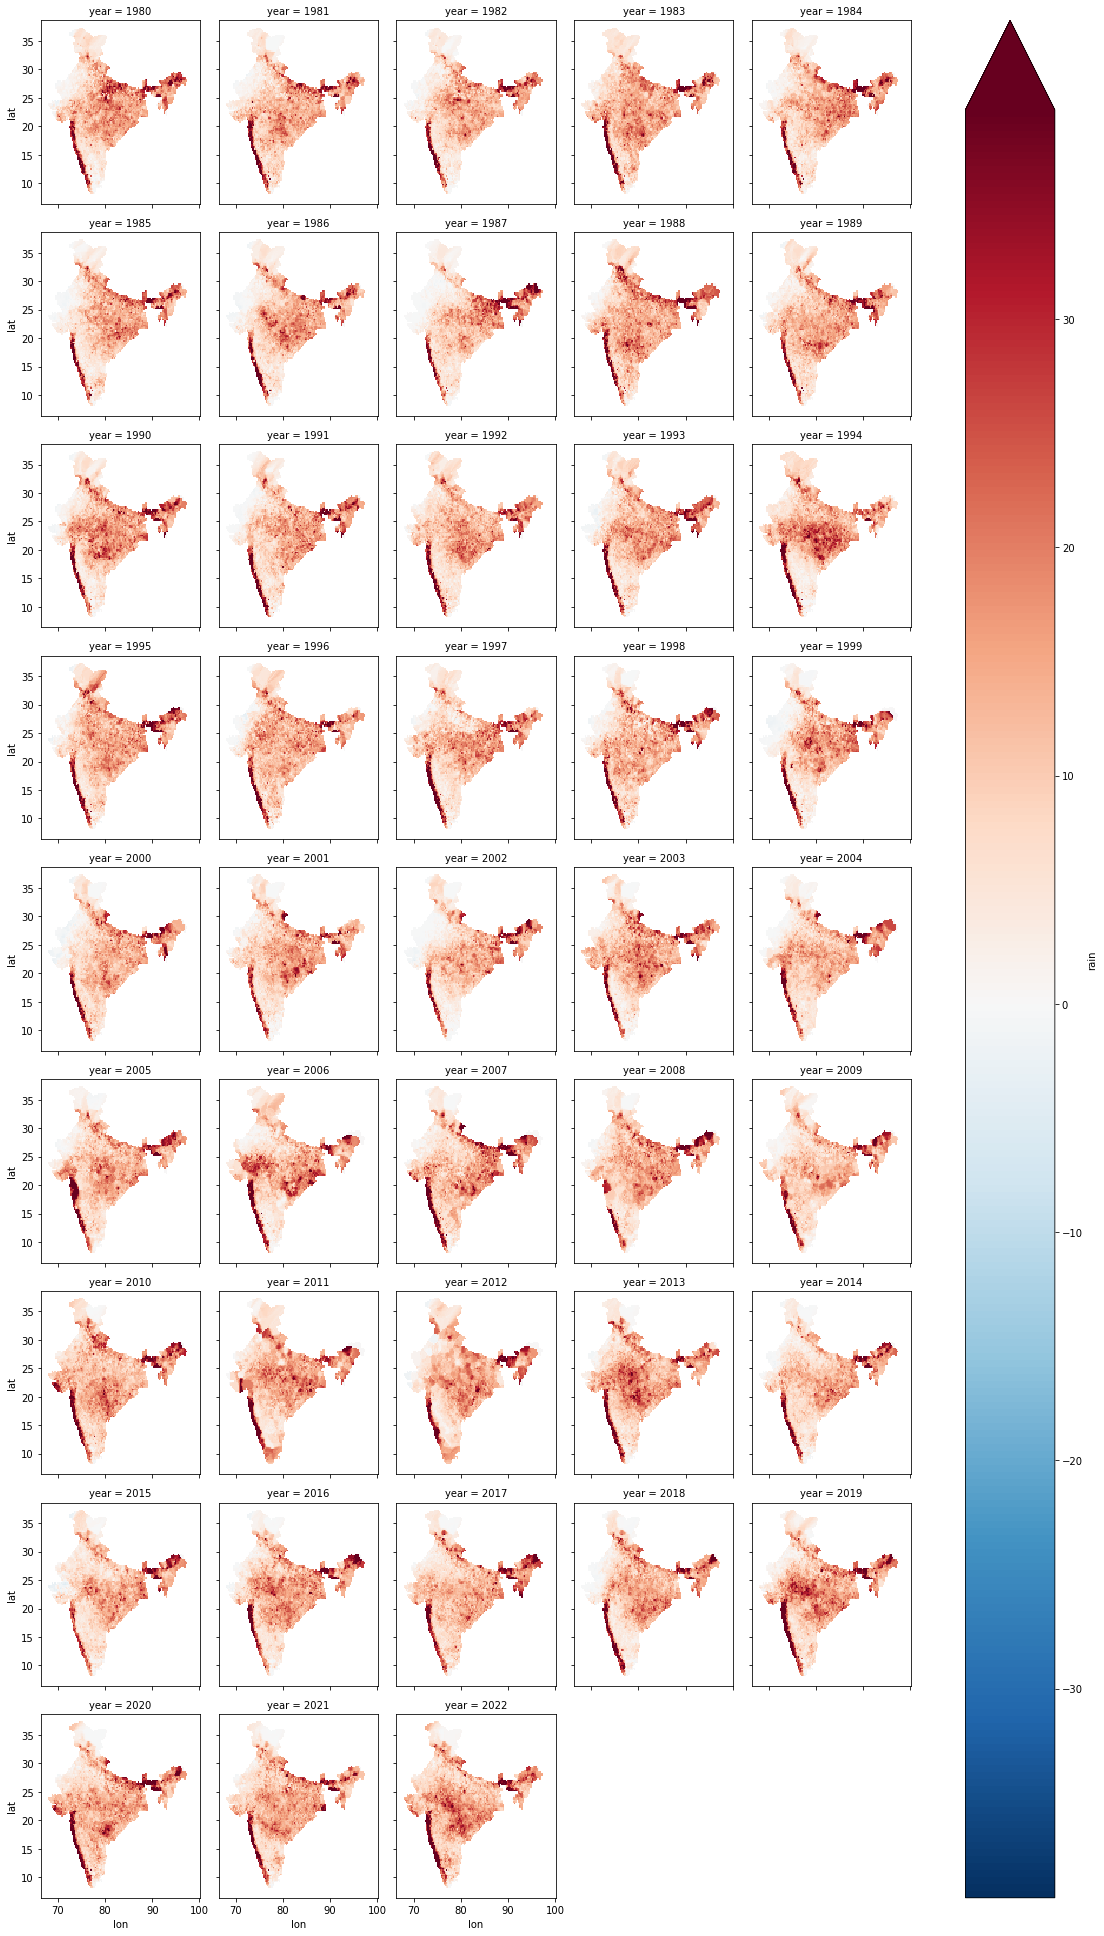

In [22]:

diff_JJAS_year_90th_perc_and_mean = ds_JJAS_year_90th_perc - ds_JJAS_year_mean

diff_JJAS_year_90th_perc_and_mean.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, robust = True, cmap = plt.cm.RdBu_r)
